## WEIGHT PRUNING

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
tf.reset_default_graph()

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist= input_data.read_data_sets('MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1


In [4]:
# Network Parameters
n_hidden_1 = 1000 # 1st layer num features
n_hidden_2 = 1000 # 2nd layer num features
n_hidden_3 = 500  # 3rd layer num features
n_hidden_4 = 200  # 4th layer num features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

In [5]:
# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [6]:
# Create model
import numpy  as np
def multilayer_perceptron(_X, _weights):
    #Hidden layer with RELU activation
    layer_1 = tf.nn.relu(tf.matmul(_X, _weights['h1'])) 
    #Hidden layer with RELU activation
    layer_2  = tf.nn.relu(tf.matmul(layer_1, _weights['h2']))
    #Hidden layer with RELU activation
    layer_3 = tf.nn.relu(tf.matmul(layer_2, _weights['h3']))
    #Hidden layer with RELU activation
    layer_4 = tf.nn.relu(tf.matmul(layer_3, _weights['h4']))
    return tf.matmul(layer_4, weights['out'])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.random_normal([n_hidden_4, n_classes]))
}


Instructions for updating:
Colocations handled automatically by placer.


In [7]:
"""
calculating th least % of weights by setting the limits of weights in the range of 
a (list containg values spaced equally using linspace as max of absolute(weights) was less than 2.5 )
and selecting just the pruning percentages that match the ones specified by the question.
"""
def pruner2part1(weights):
    weightsp1=np.array(weights['h1'].eval())
    weightsp2=np.array(weights['h2'].eval())
    weightsp3=np.array(weights['h3'].eval())
    weightsp4=np.array(weights['h4'].eval())
    
    def sub(weightsp,row,column):
        checkpoints=[0, 24, 50, 60, 70, 80, 90, 95, 97, 99]
        c=[]
        d=[]
        
        count=0
        total=0
        wess=[]
        for i in range(row):
            for j in range(column):
                wess.append(weightsp[i][j])
        wess.sort()
        for l in checkpoints:
            a=np.round((l/100)*len(wess)).astype(int)
            for i in range(a,a+1):
                c.append(wess[i])
                d.append(l)
        return(c,d)
    
    k1,perc1 = sub(weightsp1,n_input,n_hidden_1)
    k2,perc2 = sub(weightsp2,n_hidden_1,n_hidden_2)
    k3,perc3 = sub(weightsp3,n_hidden_2,n_hidden_3)
    k4,perc4 = sub(weightsp4,n_hidden_3,n_hidden_4)
    return (k1,k2,k3,k4,perc1,perc2,perc3,perc4)

In [9]:
 """
 setting weights to zero the ones that belog to least % 
 """
def sub(weightsp,k,row,column):
    count=0
    total=0              #function that sets the weights 0
    for i in range(row):
        for j in range(column):
            if(np.absolute(weightsp[i][j])<np.round(k,4)):
                weightsp[i][j]=0
    return(weightsp)
    
def pruner2part2(k1,k2,k3,k4,weights):
    weightsp1=np.array(weights['h1'].eval())  #trained weights
    weightsp2=np.array(weights['h2'].eval())
    weightsp3=np.array(weights['h3'].eval())
    weightsp4=np.array(weights['h4'].eval())
    weightsupreme1=[]
    weightsupreme2=[]  #contains weights of different peuned weights as a list
    weightsupreme3=[]
    weightsupreme4=[]
    for m in k1:
        weightsupreme1.append(sub(np.array(weightsp1),m,n_input,n_hidden_1))
    for m in k2:
        weightsupreme2.append(sub(np.array(weightsp2),m,n_hidden_1,n_hidden_2))
    for m in k3:
        weightsupreme3.append(sub(np.array(weightsp3),m,n_hidden_2,n_hidden_3))
    for m in k4:
        weightsupreme4.append(sub(np.array(weightsp4),m,n_hidden_3,n_hidden_4))
    return(weightsupreme1,weightsupreme2,weightsupreme3,weightsupreme4)

"""
model for changed weights
"""
def pruner2part3(x,w1,w2,w3,w4,weights):
    #Hidden layer with RELU activation
    layer_1 = tf.nn.relu(tf.matmul(x,w1))
    #Hidden layer with RELU activation
    layer_2  = tf.nn.relu(tf.matmul(layer_1,w2))
    #Hidden layer with RELU activation
    layer_3 = tf.nn.relu(tf.matmul(layer_2,w3))
    #Hidden layer with RELU activation
    layer_4 = tf.nn.relu(tf.matmul(layer_3,w4))
    return tf.matmul(layer_4, weights['out'])
    

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch: 0001 cost= 35839.958442383
Epoch: 0002 cost= 6827.433000585
Epoch: 0003 cost= 2964.792128695
Epoch: 0004 cost= 1356.233880482
Epoch: 0005 cost= 757.713680044
Epoch: 0006 cost= 413.437024676
Epoch: 0007 cost= 258.739327238
Epoch: 0008 cost= 223.434762790
Epoch: 0009 cost= 203.511116869
Epoch: 0010 cost= 191.439443901
Epoch: 0011 cost= 170.811672641
Epoch: 0012 cost= 150.905097995
Epoch: 0013 cost= 120.716305871
Epoch: 0014 cost= 101.374562905
Epoch: 0015 cost= 68.497783333
Optimization Finished!
[-4.3490577, -0.7138012, -0.0075492254, 0.2468554, 0.51854247, 0.8362513, 1.2774919, 1.6409265, 1.8786277, 2.3311782] [-5.0918145, -0.7149061, -0.008136025, 0.24548458, 0.51627797, 0.8347142, 1.2767617, 1.6400714, 1.8751291, 2.322353] [-4.913977, -0.72101533, -0.015892554, 0.23993504, 0.5129451, 0.829

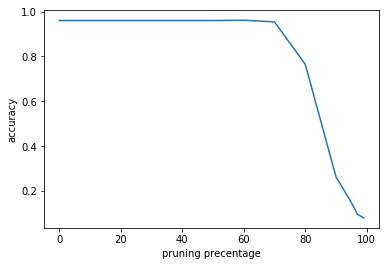

Accuracy for 0% pruning 0.9601


In [10]:
# Define loss and optimizer
# Softmax loss
pred = multilayer_perceptron(x, weights)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y)) 
# Adam Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
init = tf.global_variables_initializer()


# saver = tf.train.Saver()
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            # Compute average loss
            avg_cost += sess.run(cost, feed_dict={x: batch_xs, y: batch_ys})/total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print ("Optimization Finished!")

    # Test model
#     correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    k1,k2,k3,k4,perc1,perc2,perc3,perc4=pruner2part1(weights)
    print(k1,k2,k3,k4)
    w1,w2,w3,w4=pruner2part2(k1,k2,k3,k4,weights)
#     print(w1,w2,w3,w4)
    checkpts=[0, 25, 50, 60, 70, 80, 90, 95, 97, 99]
    accu=[]
    for r in range(10):
        correct_prediction = tf.equal(tf.argmax(pruner2part3(x,(w1[r]),(w2[r]),(w3[r]),(w4[r]),weights), 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        accu.append(accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
        print ("Accuracy for :",checkpts[r],"% pruning" ,accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
    plt.plot(checkpts,accu)
    plt.xlabel("pruning precentage")
    plt.ylabel("accuracy")
    plt.show()
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print ("Accuracy for 0% pruning", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))